# Diabetes-simple EDA & ML approach

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.4 MB 14.2 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.4 MB 10.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.4 MB 6.8 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.4 MB 5.7 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 5.4 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.4 MB/s eta 0:00:00


In [4]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_df.describe().T #Transpose of table

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
diabetes_df_copy = diabetes_df.copy(deep = True) #Replace all 0 values to null values
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


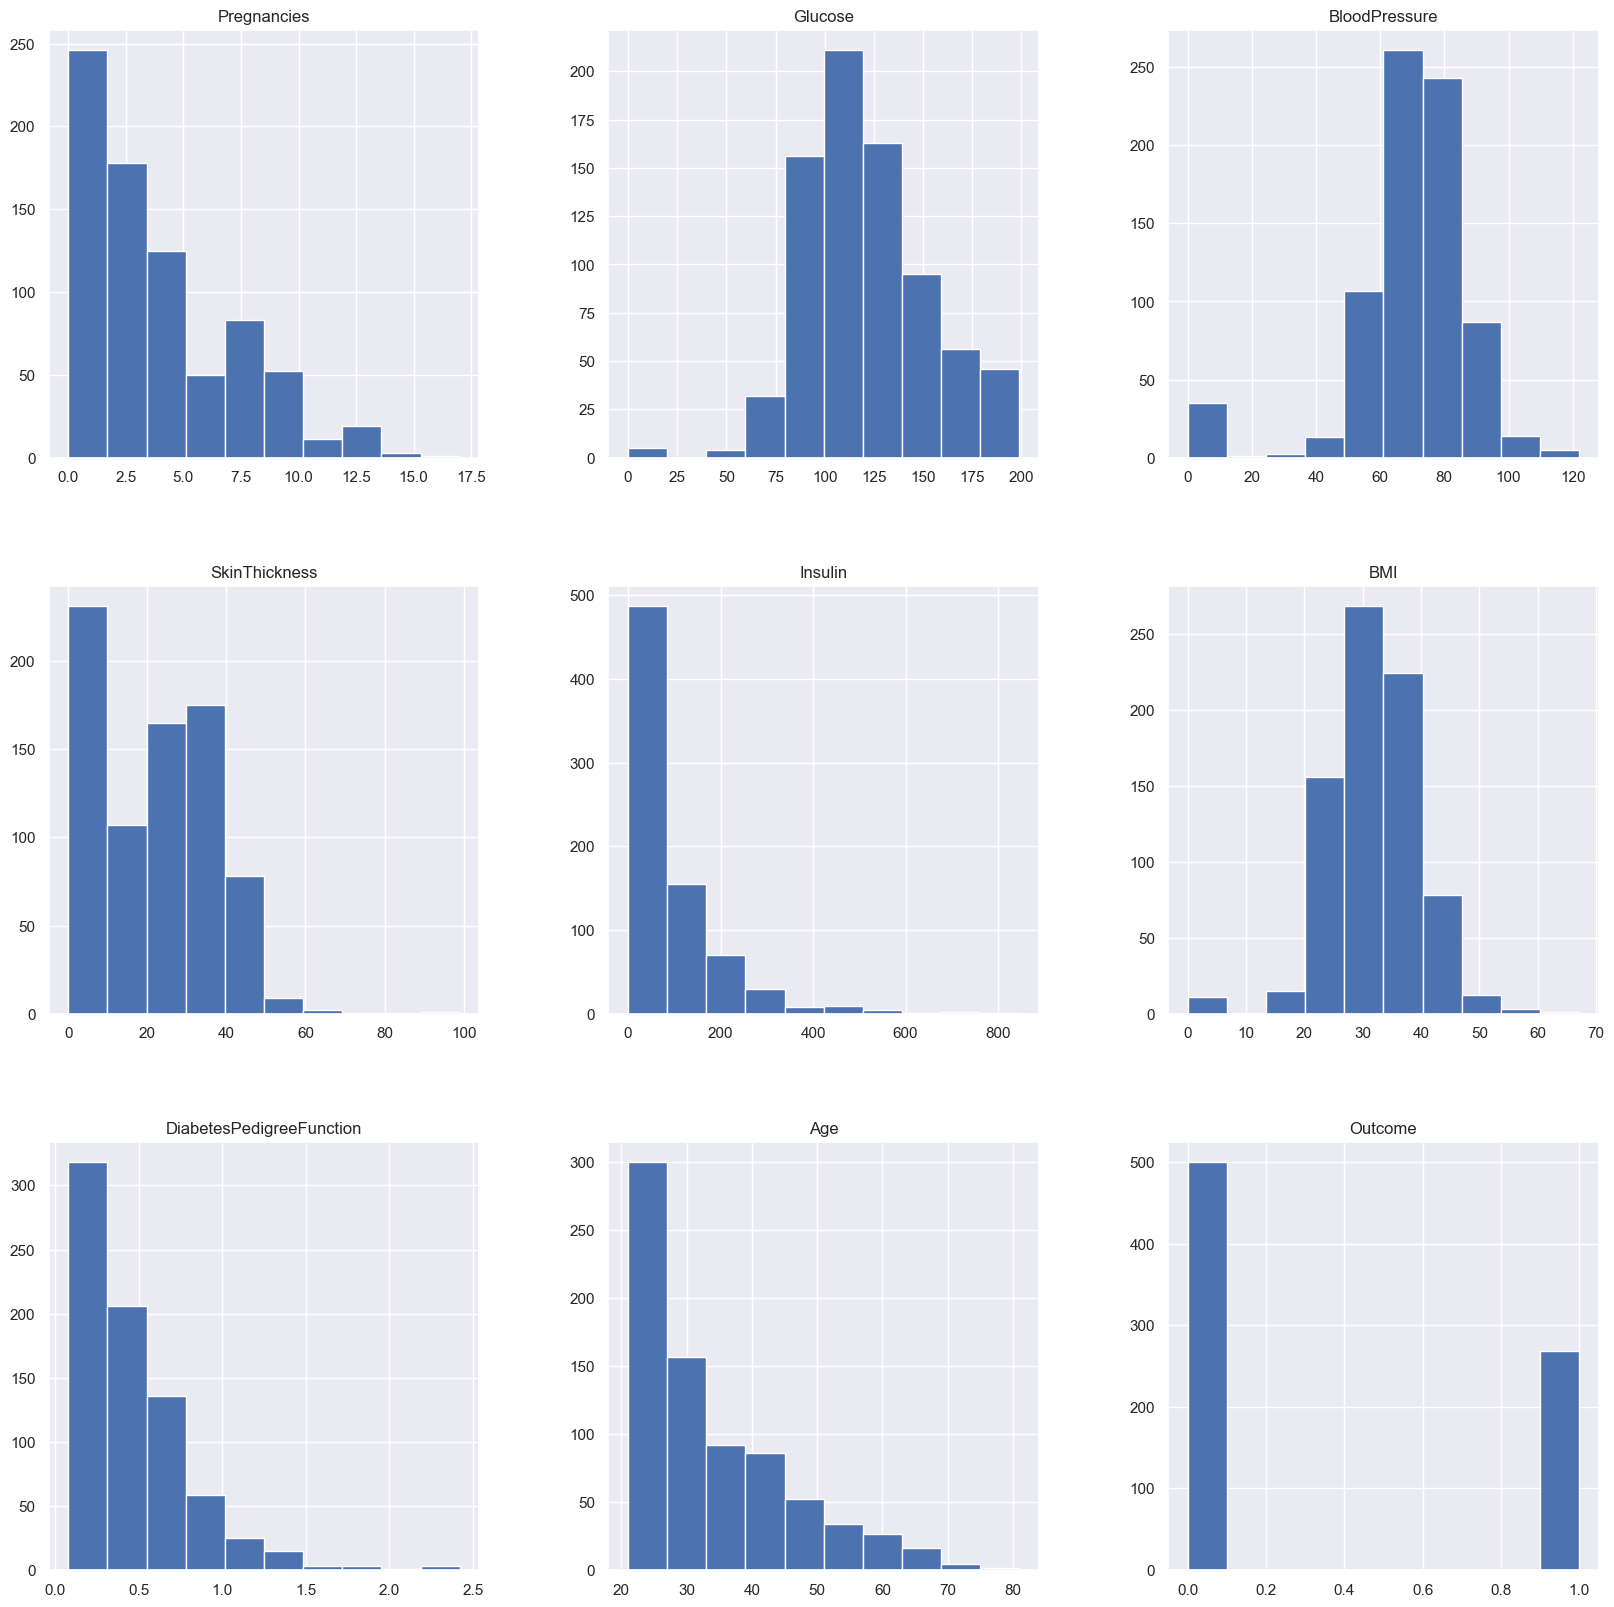

In [11]:
p=diabetes_df.hist(figsize=(20,20))

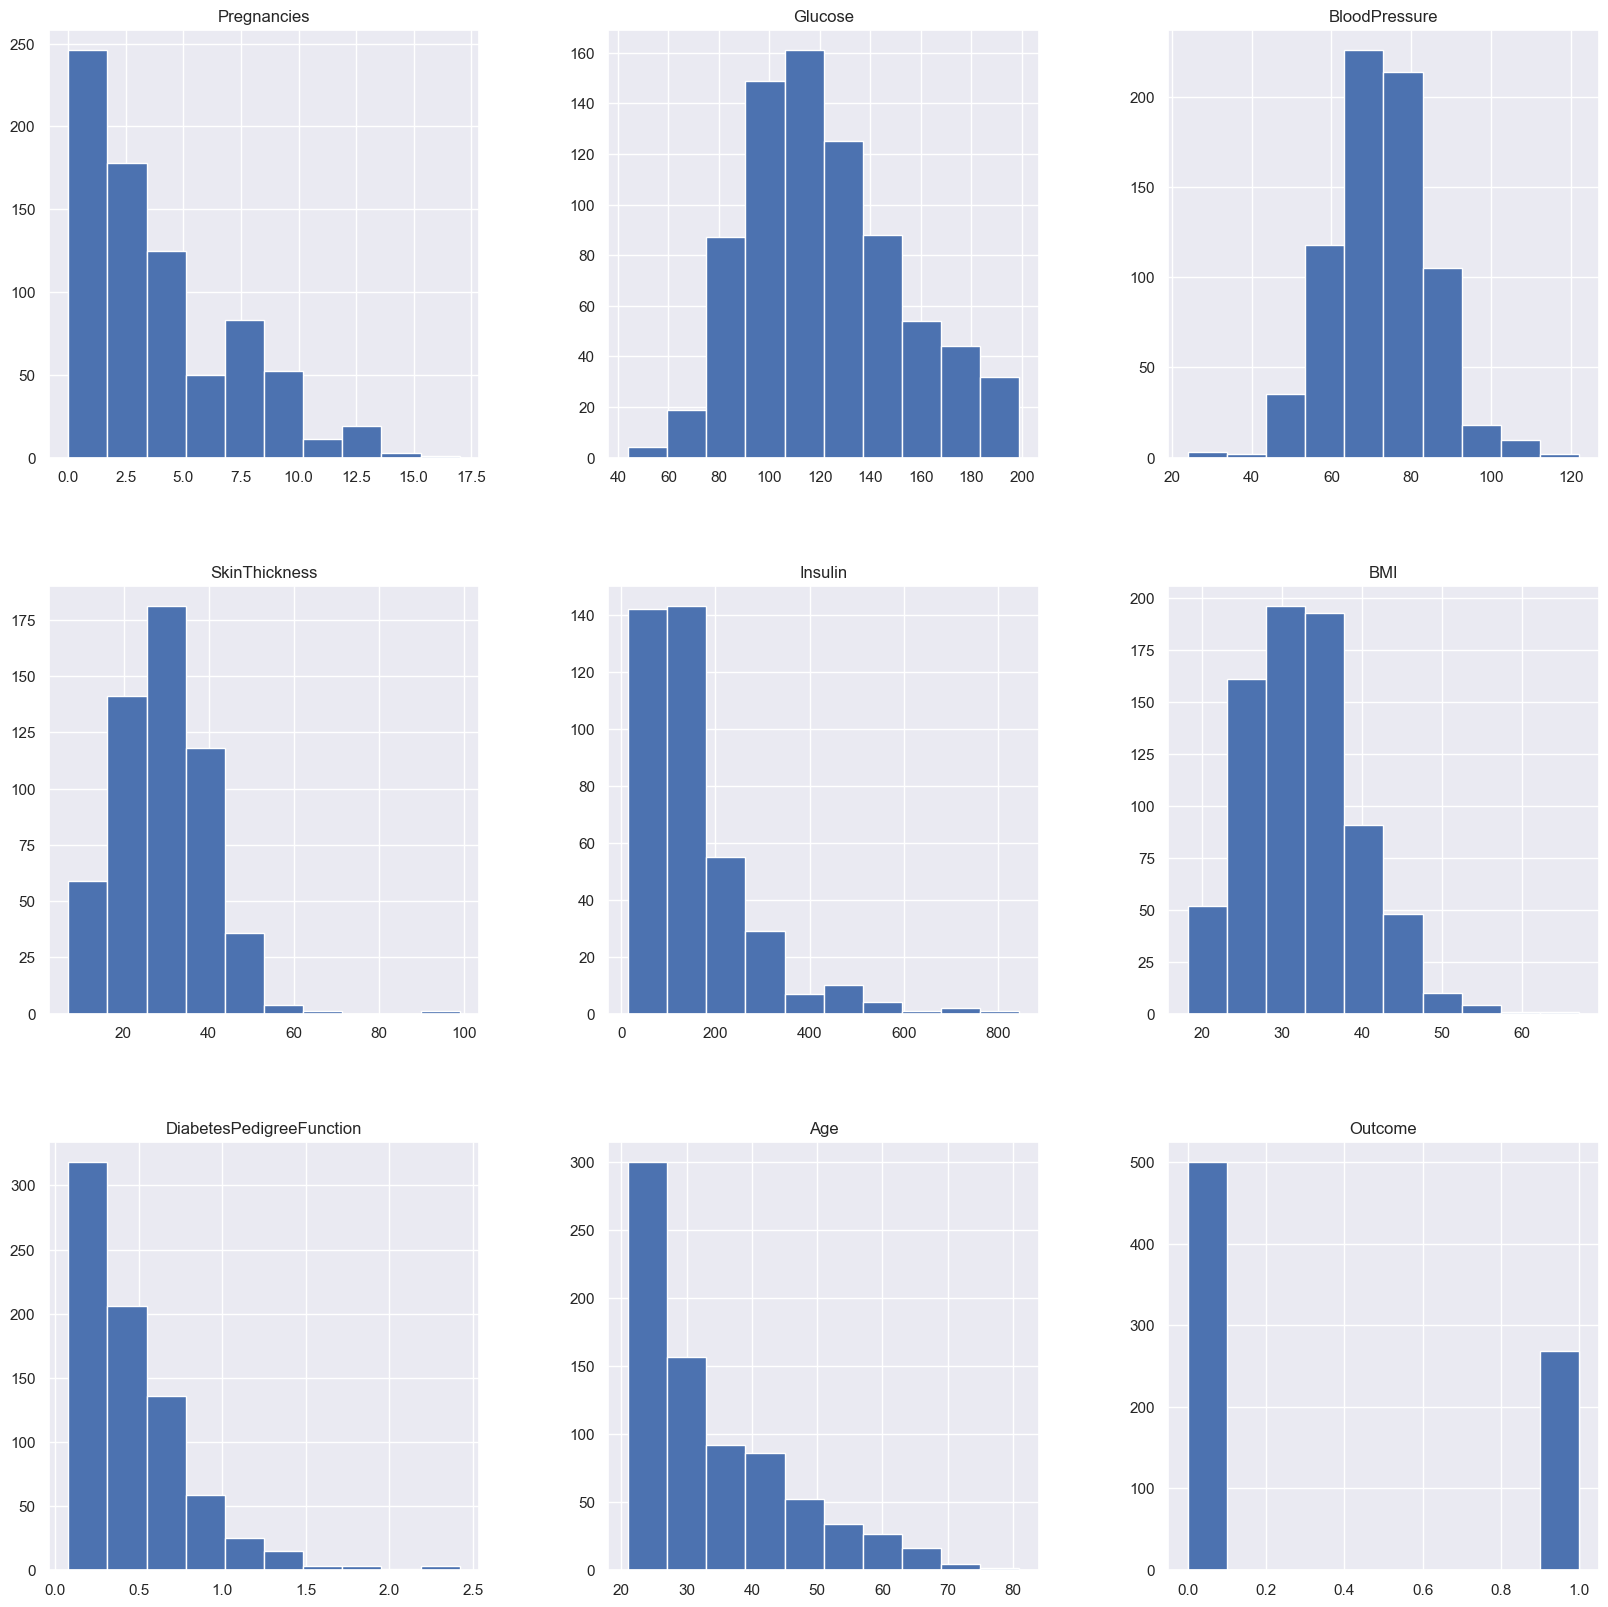

In [12]:
p=diabetes_df_copy.hist(figsize=(20,20))

In [13]:
#filling missing values with mean, median
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

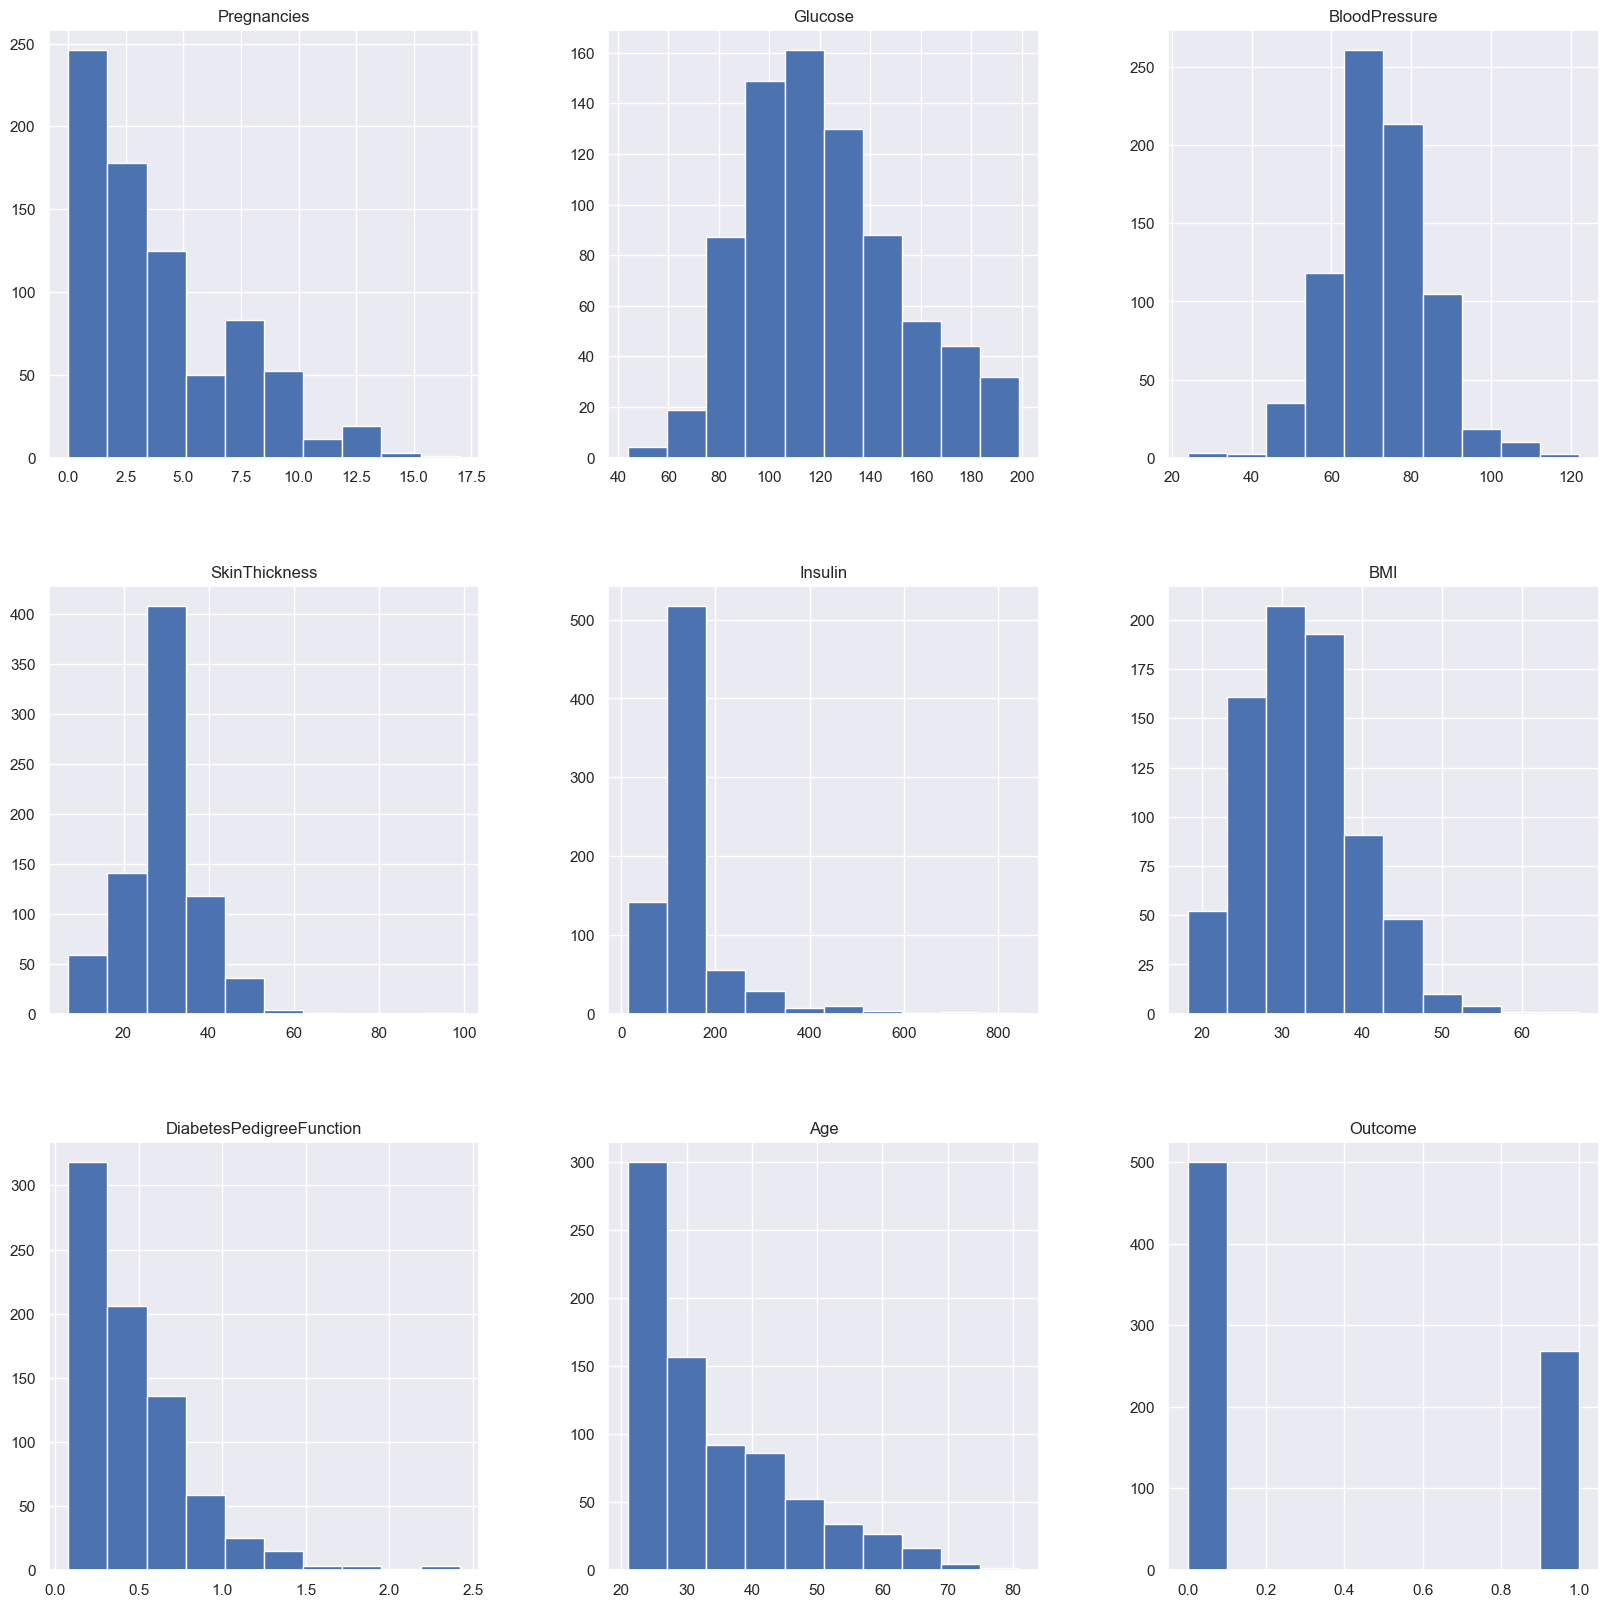

In [14]:
p = diabetes_df_copy.hist(figsize = (20,20))

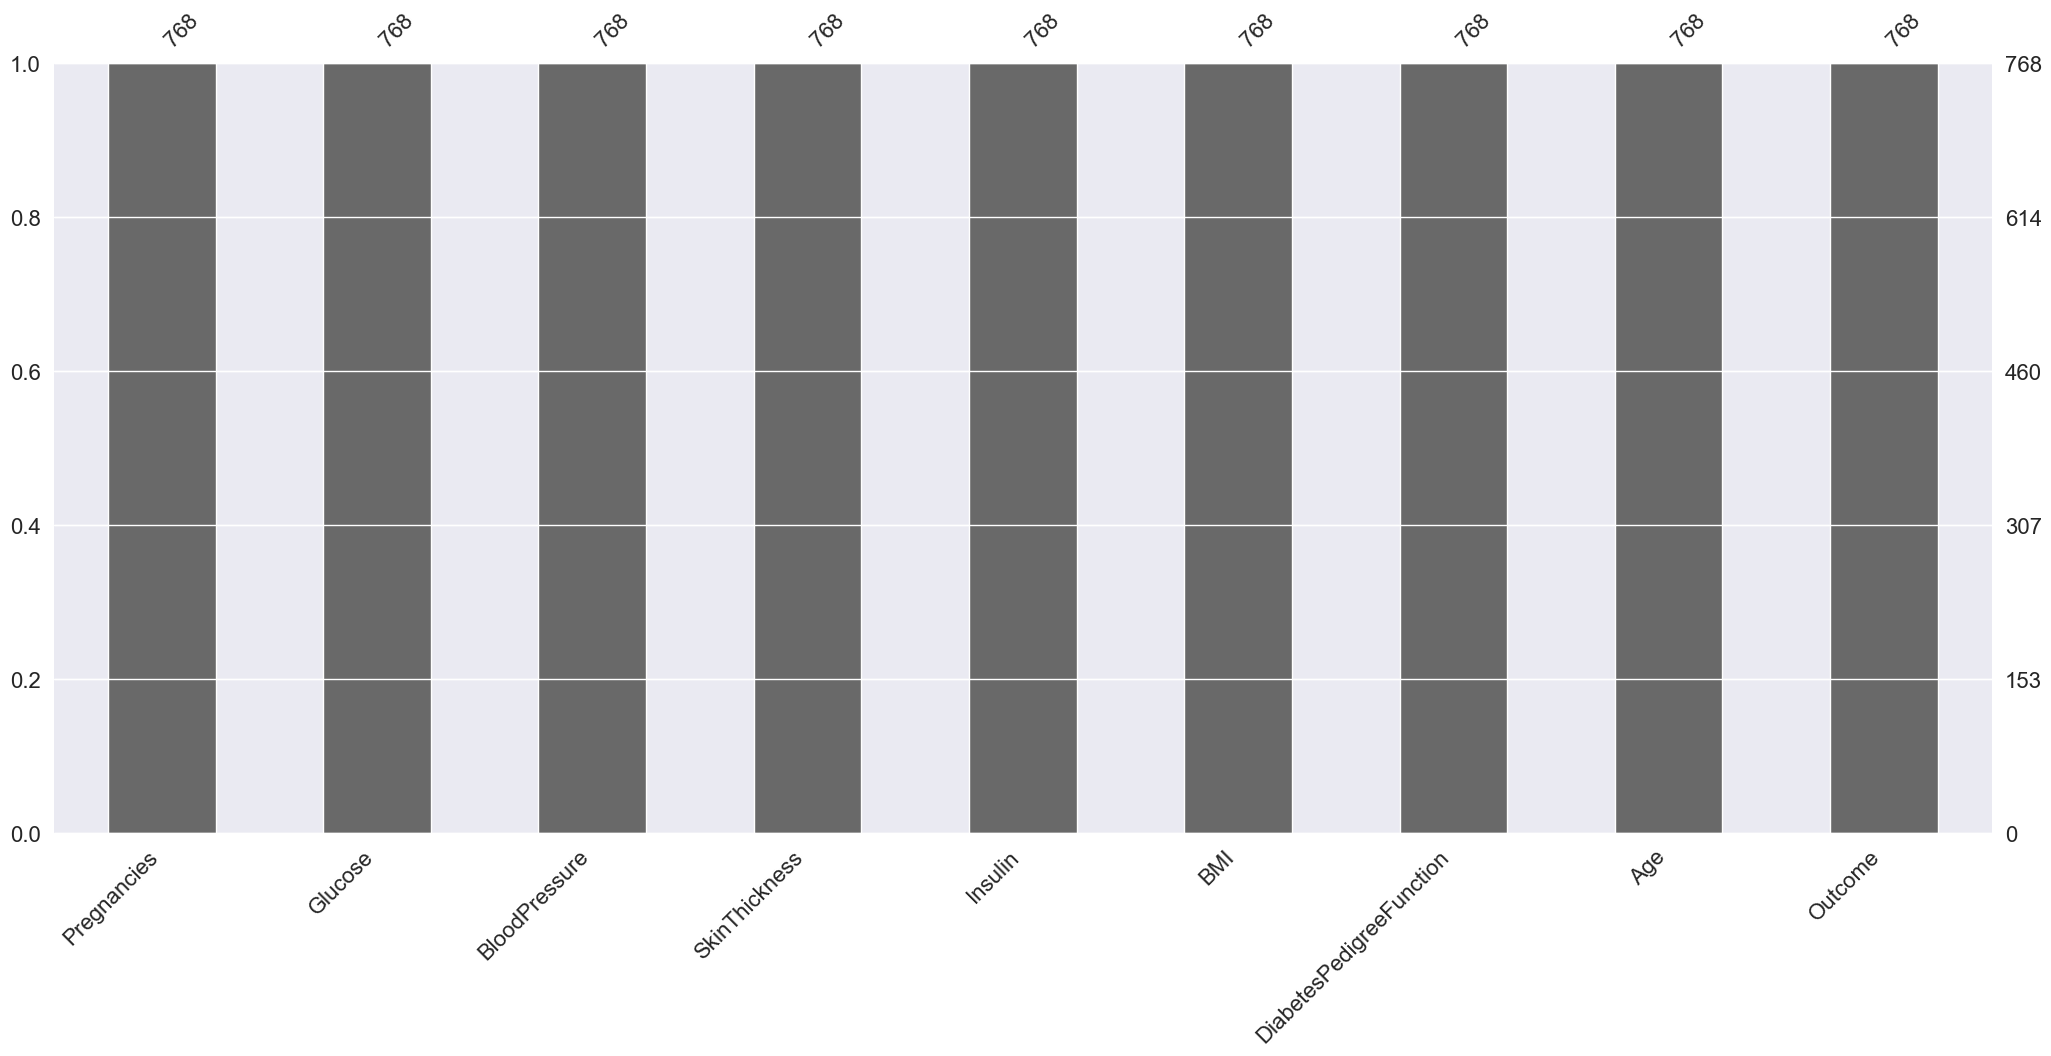

In [16]:
p=msno.bar(diabetes_df_copy) #finding missing values in bar

0    500
1    268
Name: Outcome, dtype: int64


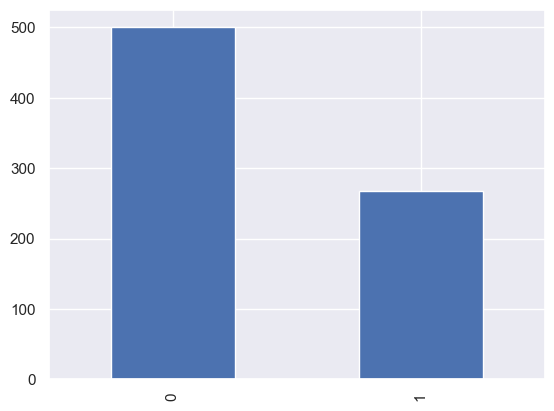

In [17]:
#Printing only the outcome column
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

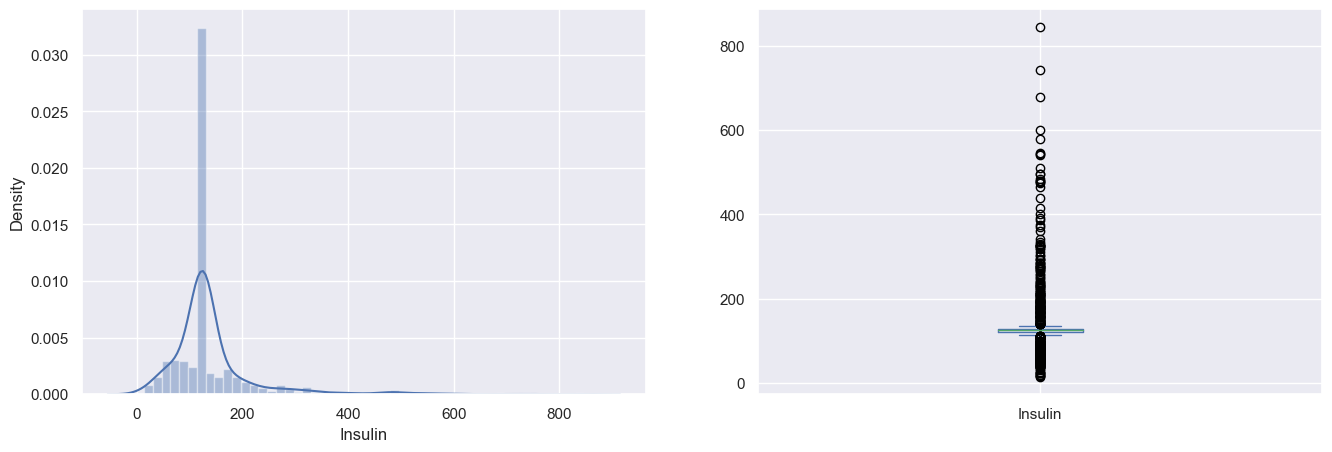

In [26]:
#finding outliers present in the INSULIN value
plt.subplot(121), sns.distplot(diabetes_df_copy['Insulin'])
plt.subplot(122), diabetes_df_copy['Insulin'].plot.box(figsize=(16,5))
plt.show()

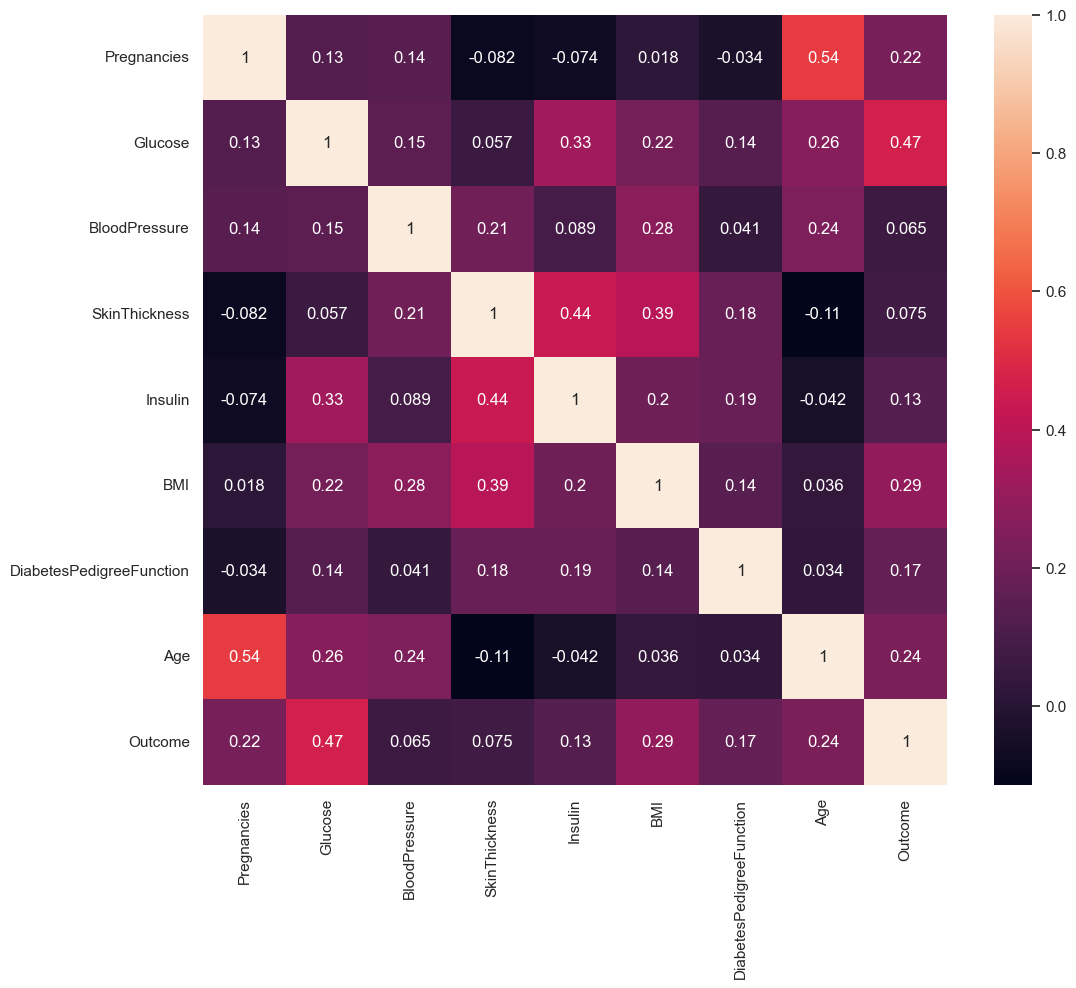

In [29]:
#Correlation matrix
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_df.corr(),annot=True)

In [31]:
sc_X=StandardScaler()
x=pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(['Outcome'],axis=1),),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [32]:
x=diabetes_df.drop('Outcome',axis=1)
y=diabetes_df['Outcome']

In [33]:
#performing training set, test set split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [1]:
from sklearn.ensemble import RandomForestClassifier  #IMPORTING RANDOM FOREST
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

In [2]:
rfc_train = rfc.predict(x_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

In [39]:
from sklearn import metrics

predictions = rfc.predict(x_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7662337662337663


In [4]:
# Print Classification Report
print("Classification Report:\n", classification_report(y_test, predictions))

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))